In [179]:
import pandas as pd
import numpy as np
import duckdb

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)

db = duckdb.connect() # No need to pass a file name, we will use a VIEW


In [180]:

db.execute('''
           DROP TABLE IF EXISTS SCHOOLS_ALL_DATA;
           CREATE TABLE SCHOOLS_ALL_DATA AS 
                SELECT 
                    'schools' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Full time equivalent number of pupils in school" "FTE Students",
                    s."% of pupils eligible for FSM" / 100 as "Percent Students FSM",
                    s."% of pupils with EHCP" / 100  "Percent Students EHCP",
                    s."% of pupils with SEN support" / 100 "Percent Students SEN",
                    s."% of pupils with English as an additional language" / 100 "Percent Students ESL",
                    s."FTE Number of teachers" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff" "Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Staff Total" "Total Staff Costs",
                    s."Maintenance & Improvement" "Maintenance & Improvement Costs",
                    s."Energy",
                    s."Educational Supplies" "Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure"
                    FROM parquet_scan('data/duck/schools_finance.parquet') as s
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                UNION
                SELECT 
                    'academies' Source,
                    s.URN, 
                    s.Region, 
                    s."London Borough",
                    s."School Name",
                    s."Type",
                    s."Overall Phase",
                    s."Number of pupils in academy (FTE)"  "FTE Students",
                    (s."% of pupils eligible for FSM") / 100 as "Percent Students FSM",
                    (s."% of pupils with an EHCP") / 100  "Percent Students EHCP",
                    (s."% of pupils with SEN support") / 100 "Percent Students SEN",
                    (s."% of pupils with English as an additional language" / 100) "Percent Students ESL",
                    s."Number of teachers in academy (FTE)" "FTE Teachers",
                    s."Teaching Staff",
                    s."Supply Staff Costs",
                    s."Education support staff",
                    s."Other Staff Costs",
                    s."Total Staff Costs",
                    s."Maintenance & Improvement Costs",
                    s."Energy",
                    s."Total Costs of Educational Supplies",
                    s."Catering supplies",
                    s."Total Income",
                    s."Total Expenditure"
                    FROM parquet_scan('data/duck/academies_finance.parquet') as s
                    WHERE "Overall Phase" = 'Primary'
                        AND "Did Not Supply flag" != 'DNS'
                        AND "FTE Students" > 0
                
           ''')

df = db.query("SELECT * FROM SCHOOLS_ALL_DATA").to_df()
#df['Progress'] = (df['READPROG_19'] + df['WRITPROG_19'] + df['MATPROG_19']) / 3
df


Source       URN      Region London Borough  \
0      schools  100010.0      London          Inner   
1      schools  100013.0      London          Inner   
2      schools  100021.0      London          Inner   
3      schools  100022.0      London          Inner   
4      schools  100027.0      London          Inner   
...        ...       ...         ...            ...   
10024  schools  112328.0  North West        Neither   
10025  schools  112356.0  North West        Neither   
10026  schools  112372.0  North West        Neither   
10027  schools  112415.0  North West        Neither   
10028  schools  112419.0  North West        Neither   

                                  School Name                    Type  \
0                    Brecknock Primary School        Community school   
1                Edith Neville Primary School        Community school   
2               Rhyl Community Primary School        Community school   
3               Richard Cobden Primary School        Community school   
4               Eleanor Palmer Primary School        Community school   
...                                       ...                     ...   
10024        Shap Endowed CofE Primary School  Voluntary aided school   
10025        Leven Valley CofE Primary School  Voluntary aided school   
10026              Warcop CofE Primary School  Voluntary aided school   
10027  Ireleth St Peter's CofE Primary School  Voluntary aided school   
10028                       Orton CofE School  Voluntary aided school   

      Overall Phase  ...  Total Staff Costs  Maintenance & Improvement Costs  \
0           Primary  ...         2060111.22                         55808.74   
1           Primary  ...         1278567.31                         29313.96   
2           Primary  ...         3603393.22                         81747.31   
3           Primary  ...         2721894.90                         55476.73   
4           Primary  ...         1479608.98                         40637.20   
...             ...  ...                ...                              ...   
10024       Primary  ...          462513.78                         24516.81   
10025       Primary  ...          331411.25                         26442.59   
10026       Primary  ...          434029.91                         17369.98   
10027       Primary  ...          397391.00                         22487.71   
10028       Primary  ...          373949.99                          7192.08   

         Energy  Total Costs of Educational Supplies  Catering supplies  \
0      41661.81                            143728.84           85222.99   
1      42657.40                             67043.22           69906.63   
2      89689.16                            129693.95          137040.41   
3      41414.87                             96535.12          125488.28   
4      24062.64                             87466.20           79882.29   
...         ...                                  ...                ...   
10024  29324.54                             66167.34           32976.42   
10025  21209.22                             50822.40           18996.26   
10026  16345.72                             62750.31           30641.76   
10027  19071.87                             45900.71           11392.13   
10028  14043.74                             39477.03           14436.29   

       Total Income  Total Expenditure  
0        2956348.24         3079153.94  
1        1962795.98         1963183.80  
2        5098185.09         4604845.17  
3        3507028.84         3601786.41  
4        1947073.07         1983031.00  
...             ...                ...  
10024     645105.58          667720.26  
10025     489616.83          520283.52  
10026     589572.38          599252.02  
10027     525139.21          552828.00  
10028     469322.92          500179.55  

[10029 rows x 24 columns]

In [181]:
# staff costs. 
# Corellation between high quality teaching and 
# increased funding levels of attainment. 
# disadvantaged cohorts

# Efficiency is in staff. 80% fo funding. 
# Schools are not evidencing this. 
# Staff costs per pupil called out as a source of study. 

# MAT 

# Disadvantaged analysis add some. 

# 

In [182]:
# Determine how financial prudance is measured in the education sector
# Total income, total expenditure, pupil numbers
 
df[['URN', 'School Name', 'Region', 'FTE Students', 'Total Income', 'Total Expenditure']]
df["Income per Student"] = df['Total Income'] / df['FTE Students']
df["Expenditure per Student"] = df['Total Expenditure'] / df['FTE Students']
df


Source       URN      Region London Borough  \
0      schools  100010.0      London          Inner   
1      schools  100013.0      London          Inner   
2      schools  100021.0      London          Inner   
3      schools  100022.0      London          Inner   
4      schools  100027.0      London          Inner   
...        ...       ...         ...            ...   
10024  schools  112328.0  North West        Neither   
10025  schools  112356.0  North West        Neither   
10026  schools  112372.0  North West        Neither   
10027  schools  112415.0  North West        Neither   
10028  schools  112419.0  North West        Neither   

                                  School Name                    Type  \
0                    Brecknock Primary School        Community school   
1                Edith Neville Primary School        Community school   
2               Rhyl Community Primary School        Community school   
3               Richard Cobden Primary School        Community school   
4               Eleanor Palmer Primary School        Community school   
...                                       ...                     ...   
10024        Shap Endowed CofE Primary School  Voluntary aided school   
10025        Leven Valley CofE Primary School  Voluntary aided school   
10026              Warcop CofE Primary School  Voluntary aided school   
10027  Ireleth St Peter's CofE Primary School  Voluntary aided school   
10028                       Orton CofE School  Voluntary aided school   

      Overall Phase  ...    Energy  Total Costs of Educational Supplies  \
0           Primary  ...  41661.81                            143728.84   
1           Primary  ...  42657.40                             67043.22   
2           Primary  ...  89689.16                            129693.95   
3           Primary  ...  41414.87                             96535.12   
4           Primary  ...  24062.64                             87466.20   
...             ...  ...       ...                                  ...   
10024       Primary  ...  29324.54                             66167.34   
10025       Primary  ...  21209.22                             50822.40   
10026       Primary  ...  16345.72                             62750.31   
10027       Primary  ...  19071.87                             45900.71   
10028       Primary  ...  14043.74                             39477.03   

       Catering supplies  Total Income  Total Expenditure  Income per Student  \
0               85222.99    2956348.24         3079153.94         9040.820306   
1               69906.63    1962795.98         1963183.80         9863.296382   
2              137040.41    5098185.09         4604845.17        12404.343285   
3              125488.28    3507028.84         3601786.41         8532.916886   
4               79882.29    1947073.07         1983031.00         8250.309619   
...                  ...           ...                ...                 ...   
10024           32976.42     645105.58          667720.26         7128.238453   
10025           18996.26     489616.83          520283.52         7307.713881   
10026           30641.76     589572.38          599252.02         7278.671358   
10027           11392.13     525139.21          552828.00         7501.988714   
10028           14436.29     469322.92          500179.55         8533.144000   

       Expenditure per Student  
0                  9416.372905  
1                  9865.245226  
2                 11204.002847  
3                  8763.470584  
4                  8402.673729  
...                        ...  
10024              7378.124420  
10025              7765.425672  
10026              7398.173086  
10027              7897.542857  
10028              9094.173636  

[10029 rows x 26 columns]

In [183]:

df['IE Ratio'] = (df['Total Expenditure'] / df['Total Income'])

print('Mean IE Ratio:', df['IE Ratio'].mean())
print('Median IE Ratio:', df['IE Ratio'].median())
print('Min IE Ratio:', df['IE Ratio'].min())
print('Max IE Ratio:', df['IE Ratio'].max())

print('STD IE Ratio:', df['IE Ratio'].std())

Mean IE Ratio: 1.0122200174949871
Median IE Ratio: 1.009685394869481
Min IE Ratio: 0.23832802609652762
Max IE Ratio: 6.470858165060909
STD IE Ratio: 0.08429448026007685


In [184]:
df['Student Buckets'] = pd.cut(df['FTE Students'], [0,200,400,600,800,1000,1200,1400,10000])
df["Student Buckets"] = df["Student Buckets"].apply(lambda interval: interval.left + 200)
def create_total_ratio(col, df):
    df[col + ' vs Total Expenditure Ratio'] = df[col] / df['Total Expenditure']
def create_staff_ratio(col, df):
    df[col + ' vs Staff Cost Ratio'] = df[col] / df['Total Expenditure']
def create_student_ratio(col, df):
    df[col + ' vs FTE Students Ratio'] = df[col] / df['FTE Students']

In [185]:

df['Student Buckets'].unique()

[400, 200, 600, 800, 1000, 1200, 1400, 1600]
Categories (8, int64): [200 < 400 < 600 < 800 < 1000 < 1200 < 1400 < 1600]

In [186]:
create_total_ratio('Teaching Staff', df)
create_total_ratio('Supply Staff Costs', df)
create_total_ratio('Education support staff', df)
create_total_ratio('Other Staff Costs', df)
create_total_ratio('Total Staff Costs', df)
create_total_ratio('Maintenance & Improvement Costs', df)
create_total_ratio('Energy', df)
create_total_ratio('Total Costs of Educational Supplies', df)
create_total_ratio('Catering supplies', df)

create_staff_ratio('Teaching Staff', df)
create_staff_ratio('Supply Staff Costs', df)
create_staff_ratio('Education support staff', df)
create_staff_ratio('Other Staff Costs', df)

create_student_ratio('Teaching Staff', df)
create_student_ratio('Supply Staff Costs', df)
create_student_ratio('Education support staff', df)
create_student_ratio('Other Staff Costs', df)
create_student_ratio('Total Staff Costs', df)
create_student_ratio('Maintenance & Improvement Costs', df)
create_student_ratio('Energy', df)
create_student_ratio('Total Costs of Educational Supplies', df)
create_student_ratio('Catering supplies', df)

<Axes: ylabel='Frequency'>

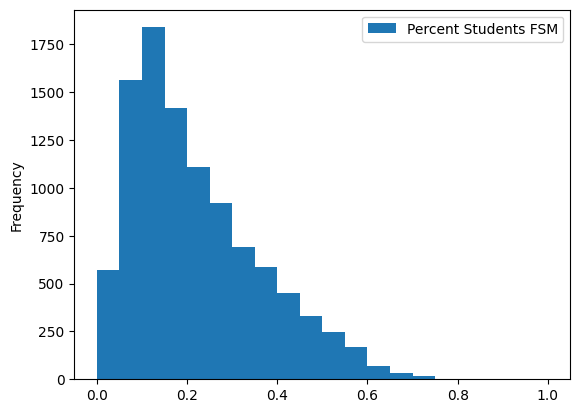

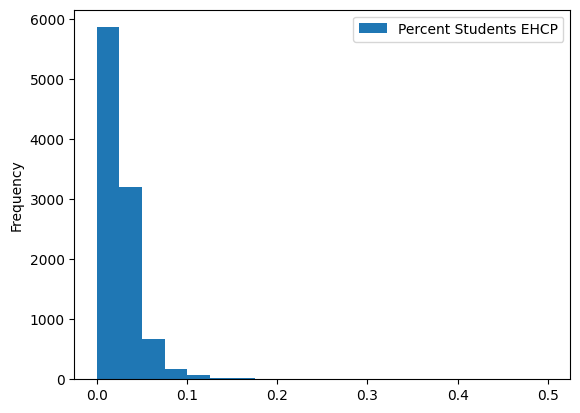

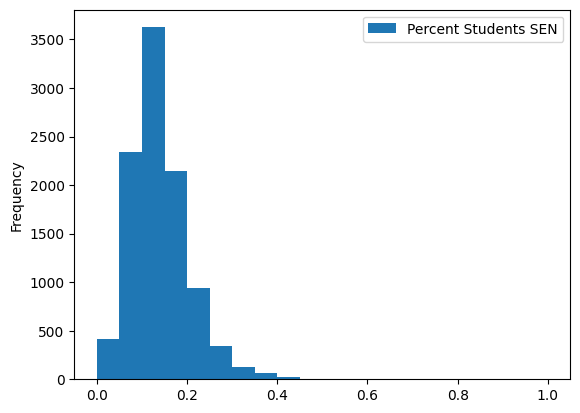

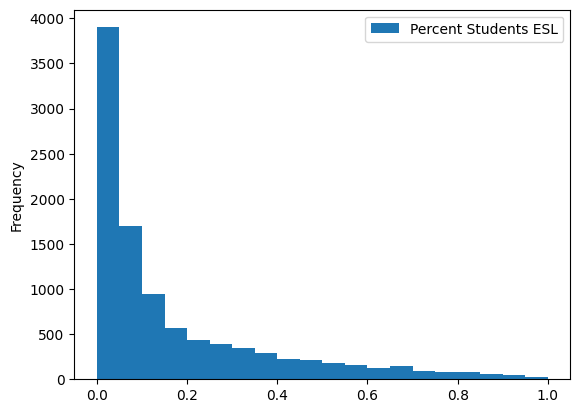

In [187]:
df[['Percent Students FSM']].plot.hist(bins=20)
df[['Percent Students EHCP']].plot.hist(bins=20)
df[['Percent Students SEN']].plot.hist(bins=20)
df[['Percent Students ESL']].plot.hist(bins=20)

In [188]:
def plot_student_groups(col): 
    df.plot.scatter(x='Percent Students FSM', y=col, c='FTE Students')
    df.plot.scatter(x='Percent Students EHCP', y=col, c='FTE Students')
    df.plot.scatter(x='Percent Students SEN', y=col, c='FTE Students')
    df.plot.scatter(x='Percent Students ESL', y=col, c='FTE Students')    

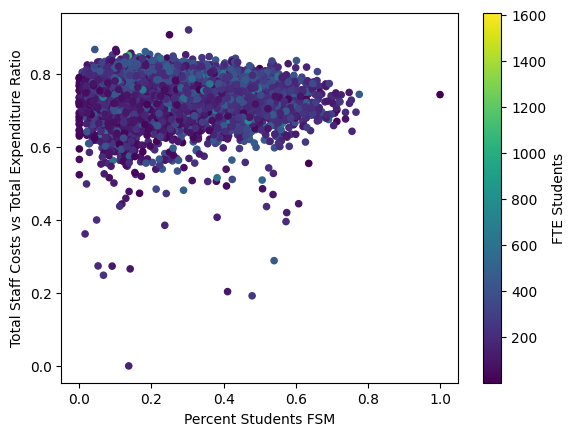

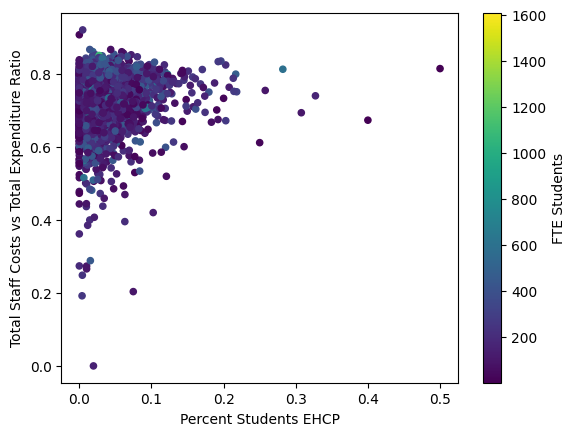

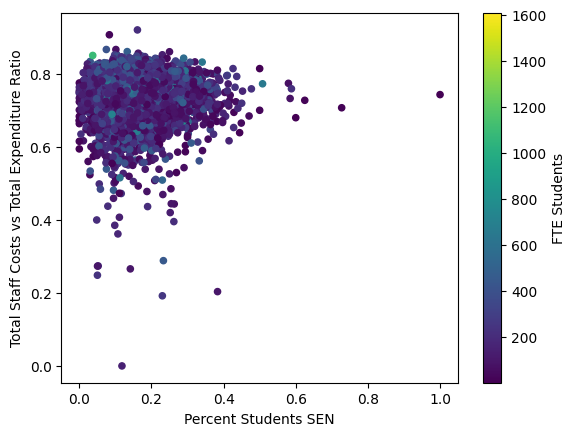

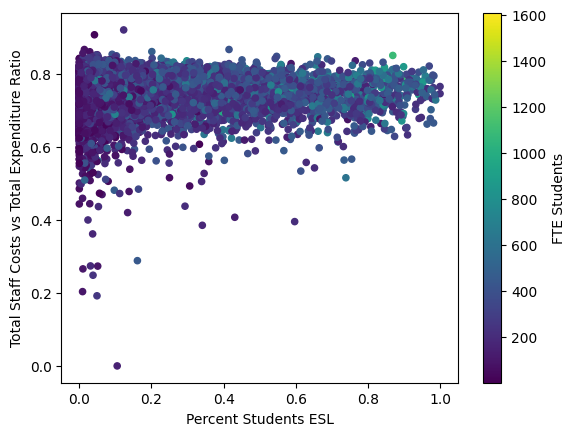

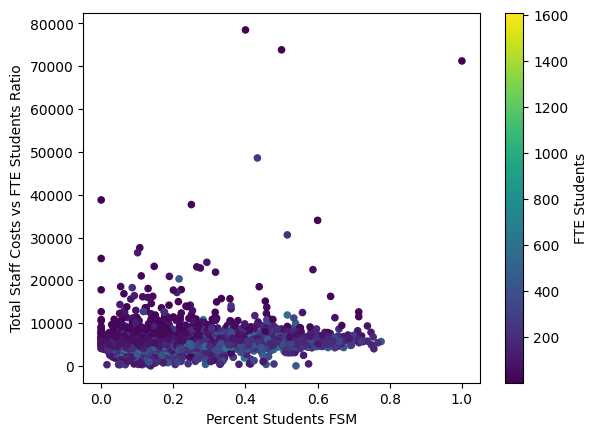

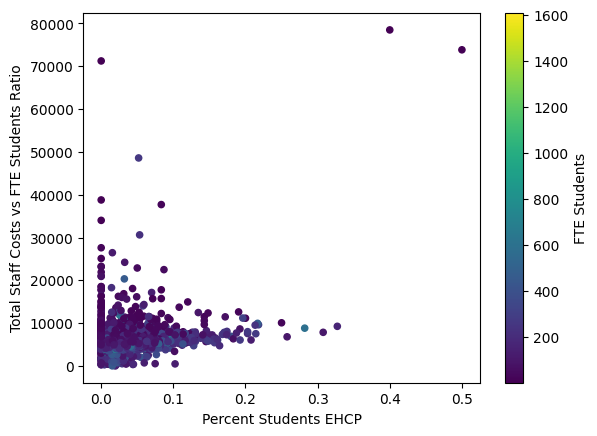

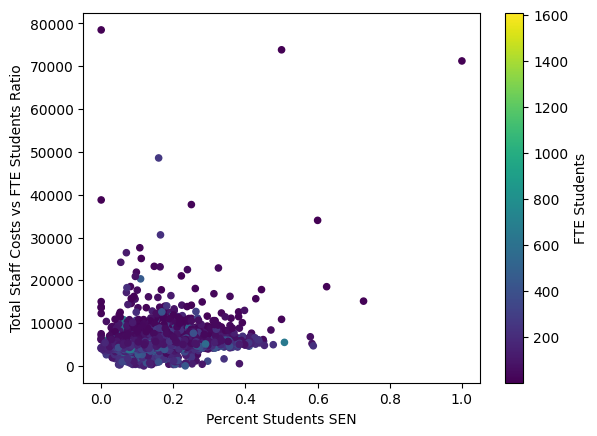

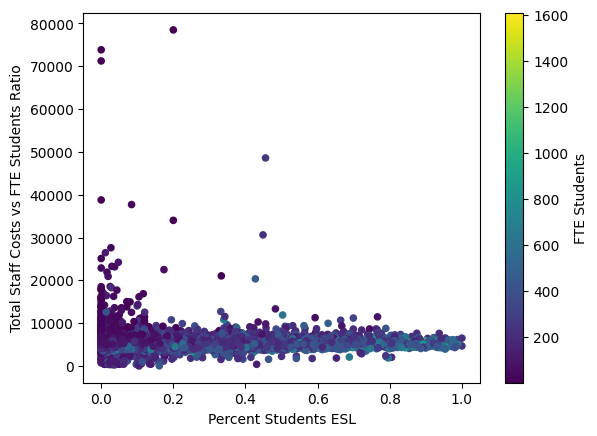

In [189]:
plot_student_groups('Total Staff Costs vs Total Expenditure Ratio')
plot_student_groups('Total Staff Costs vs FTE Students Ratio')


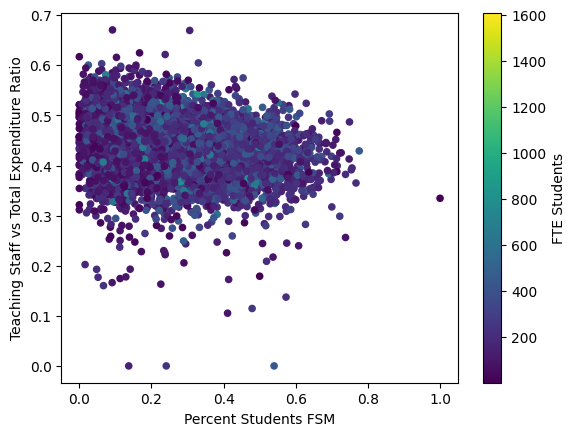

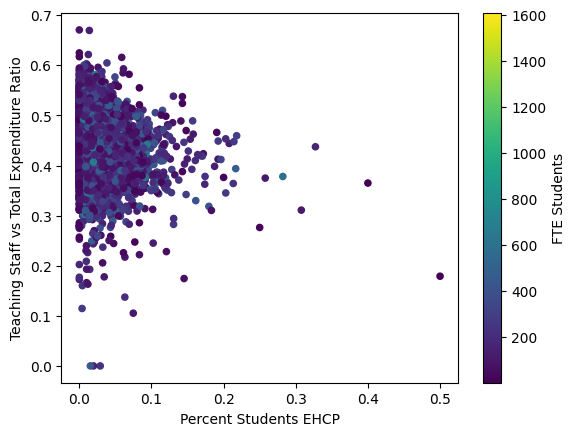

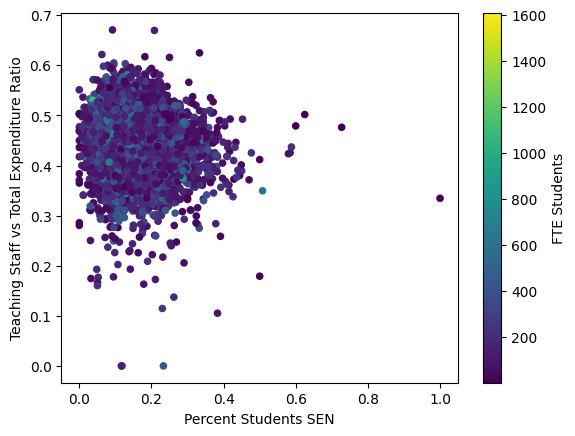

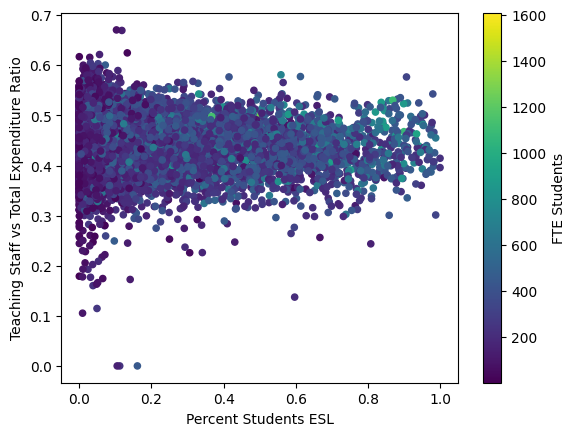

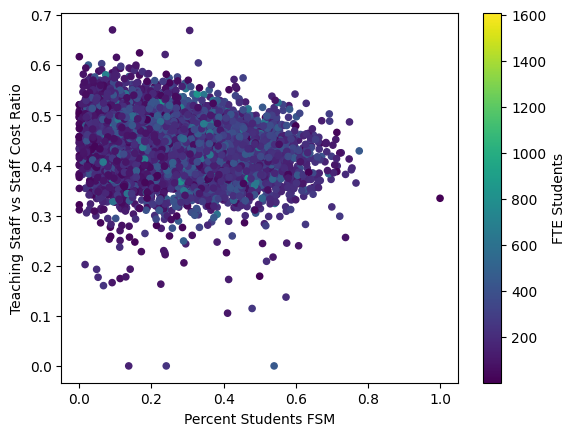

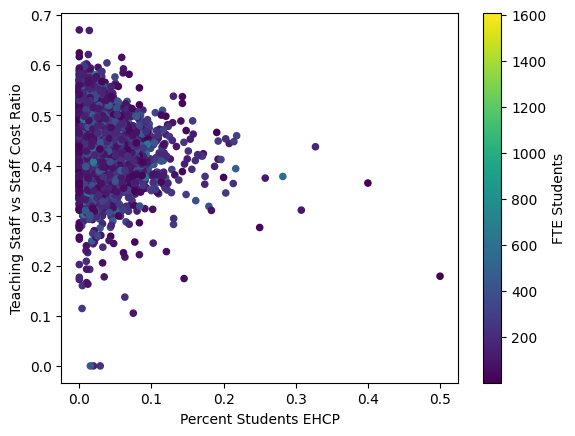

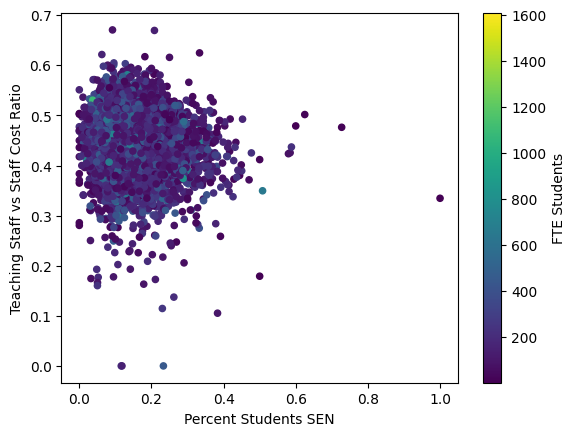

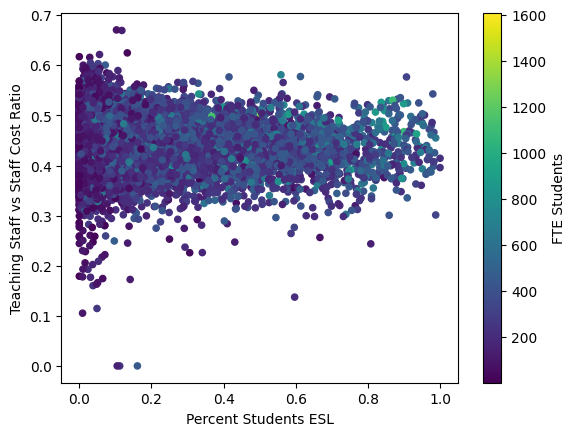

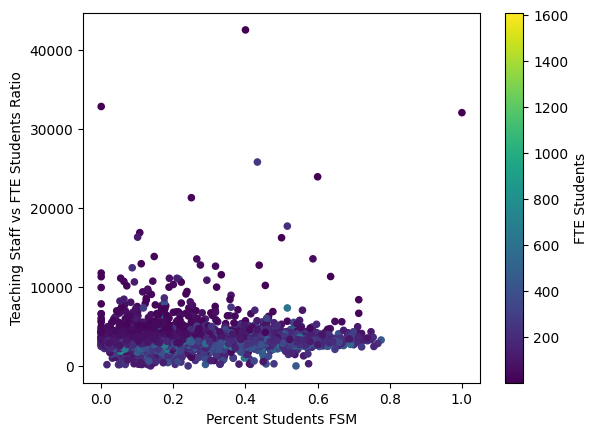

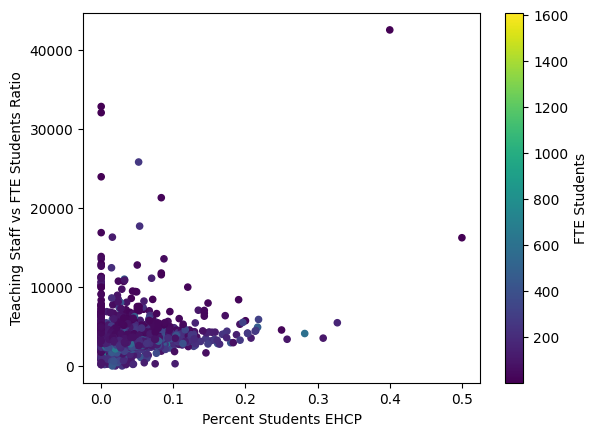

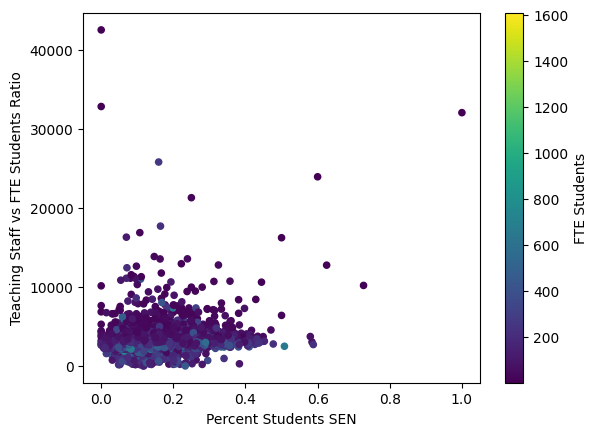

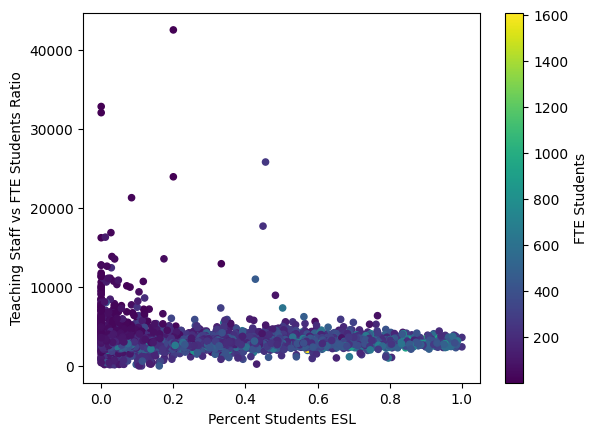

In [190]:
plot_student_groups('Teaching Staff vs Total Expenditure Ratio')
plot_student_groups('Teaching Staff vs Staff Cost Ratio')
plot_student_groups('Teaching Staff vs FTE Students Ratio')

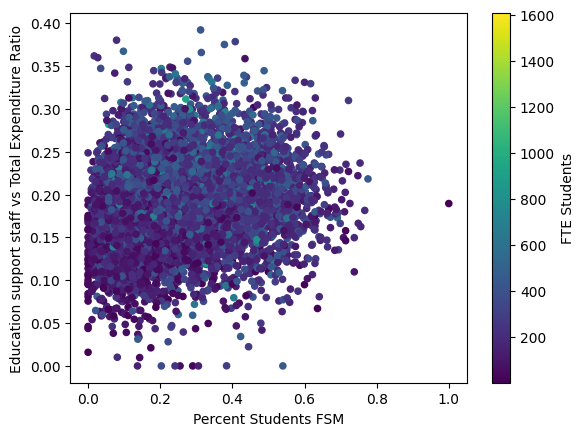

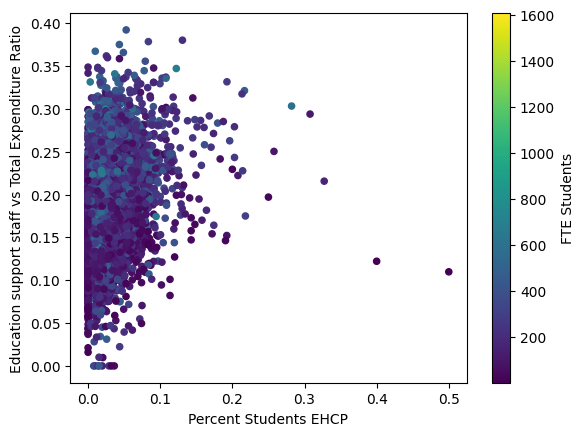

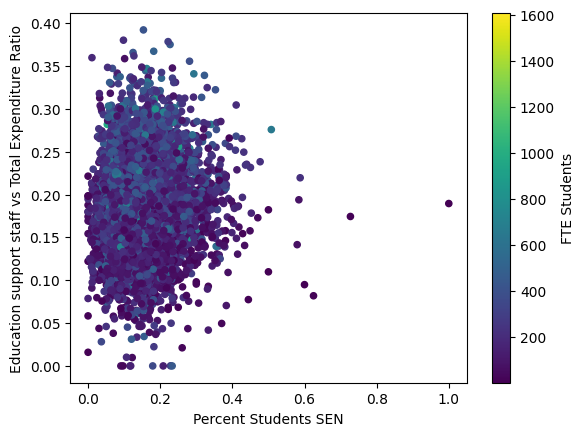

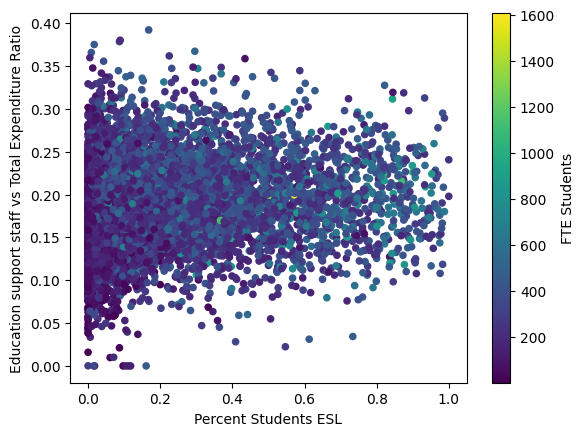

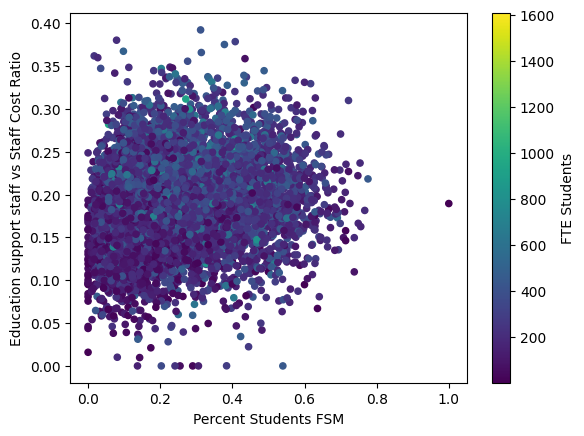

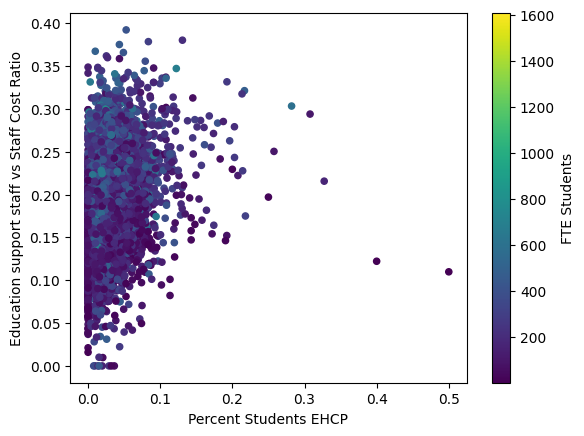

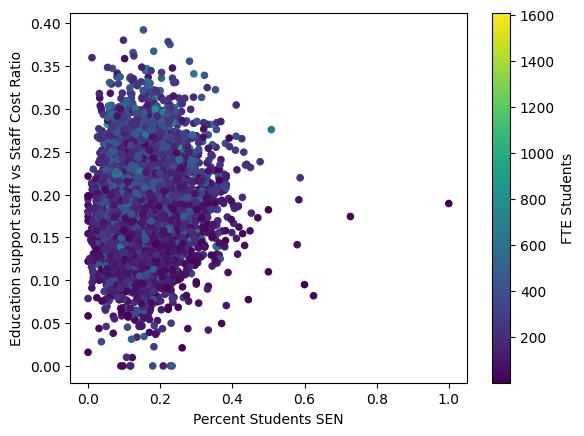

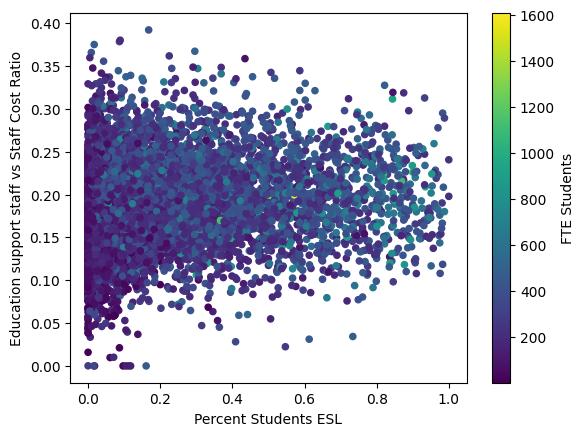

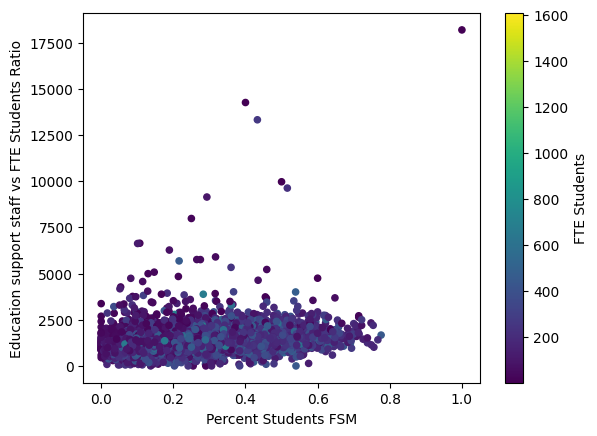

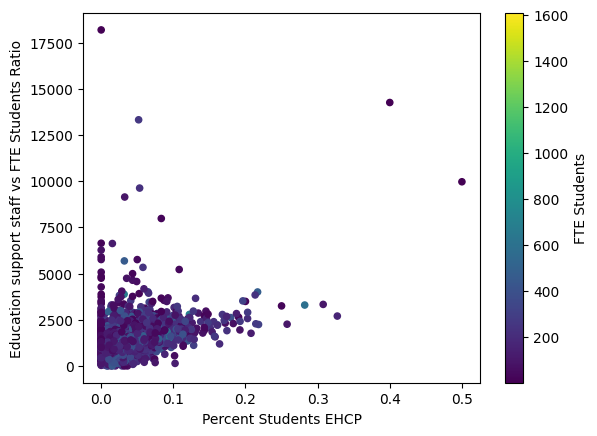

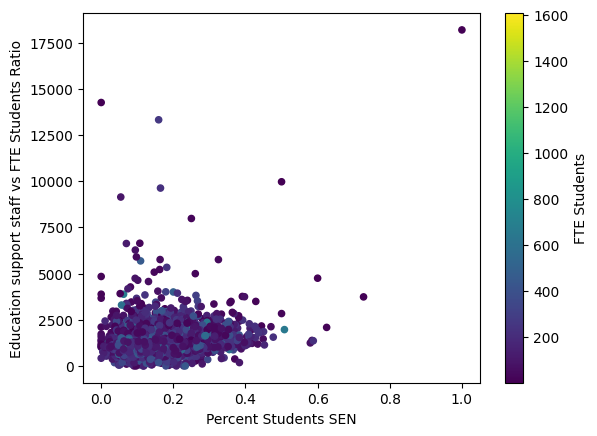

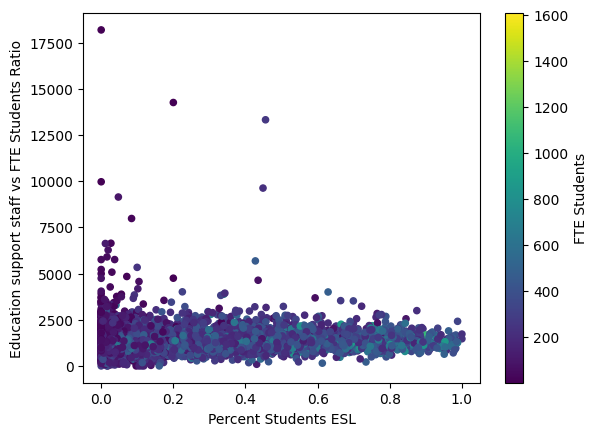

In [191]:
plot_student_groups('Education support staff vs Total Expenditure Ratio')
plot_student_groups('Education support staff vs Staff Cost Ratio')
plot_student_groups('Education support staff vs FTE Students Ratio')

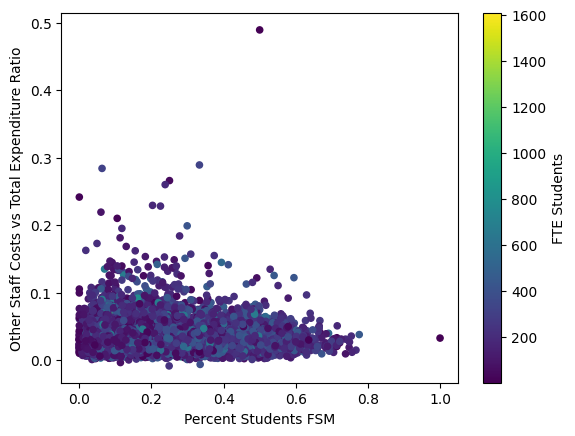

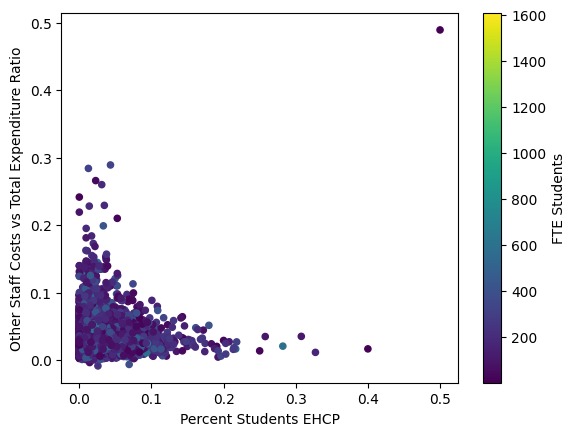

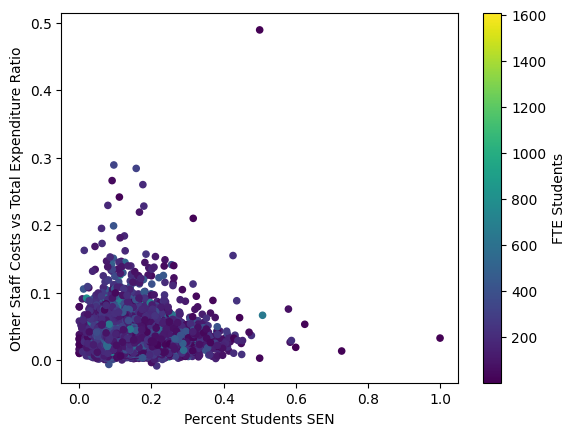

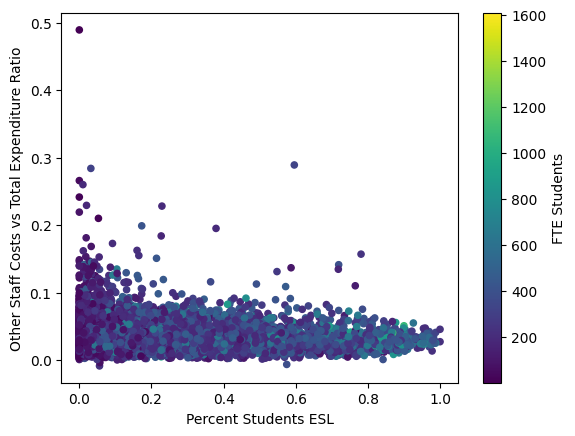

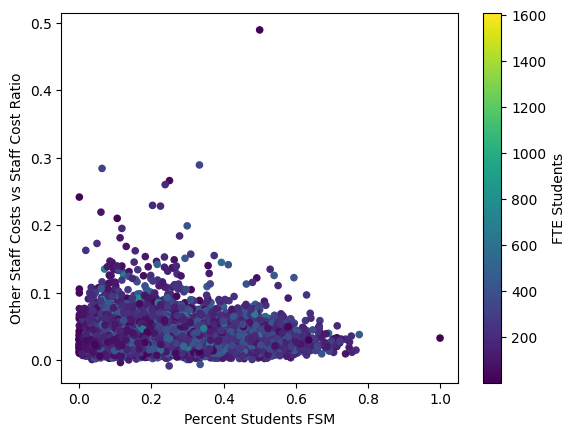

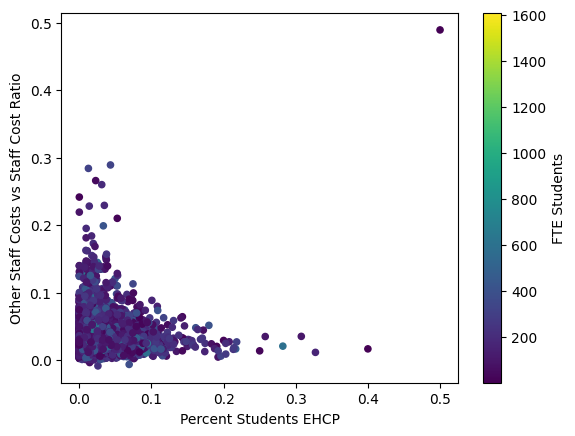

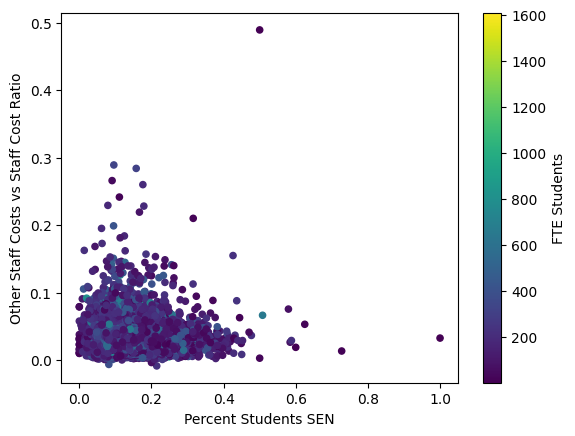

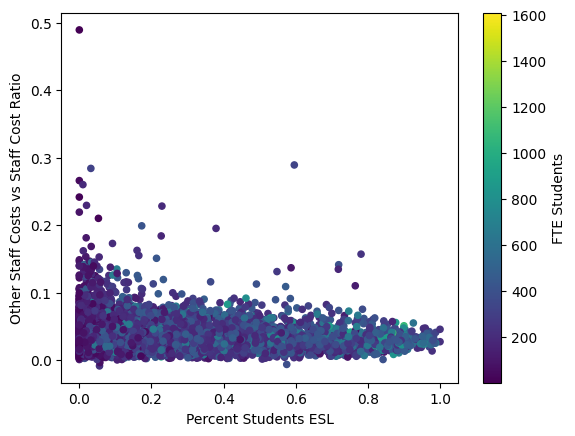

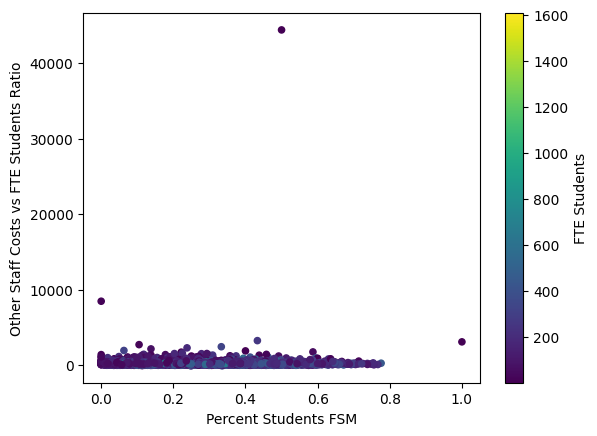

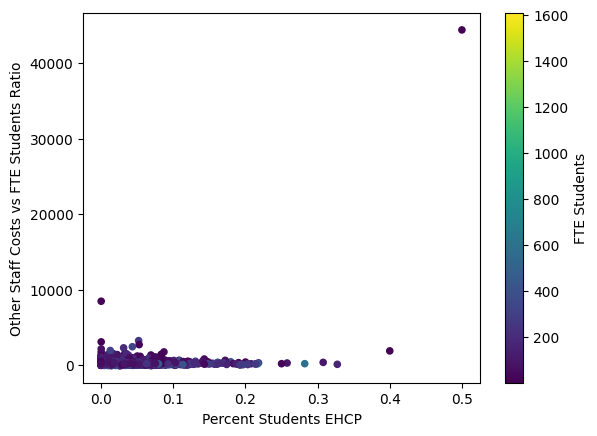

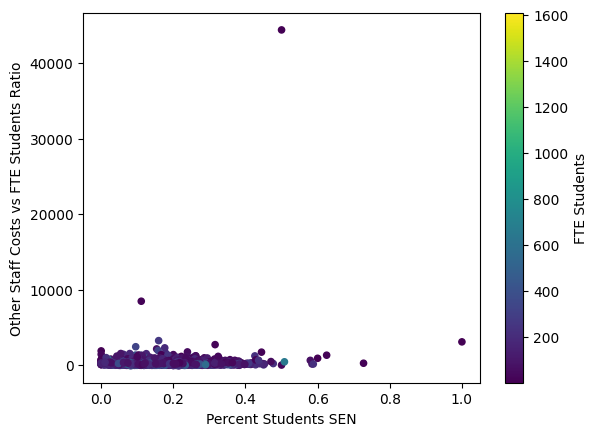

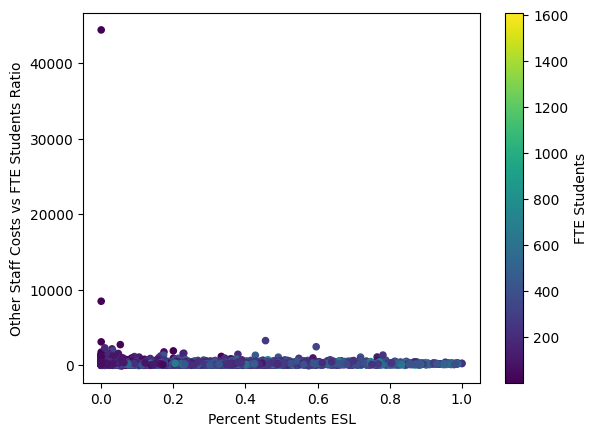

In [192]:
plot_student_groups('Other Staff Costs vs Total Expenditure Ratio')
plot_student_groups('Other Staff Costs vs Staff Cost Ratio')
plot_student_groups('Other Staff Costs vs FTE Students Ratio')

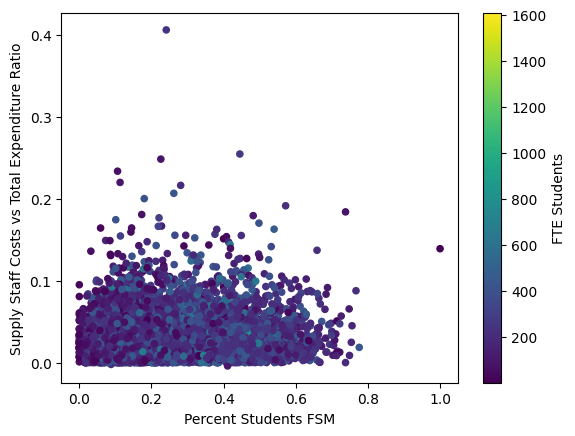

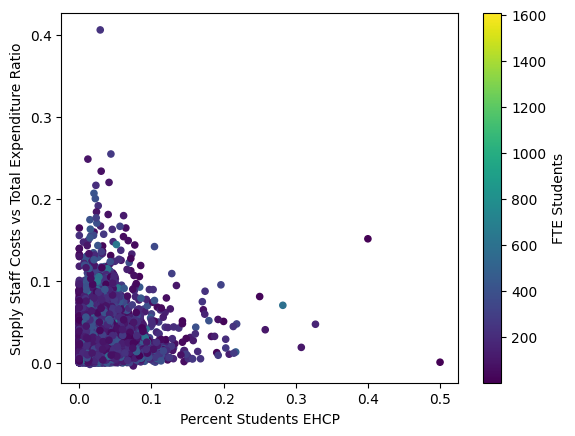

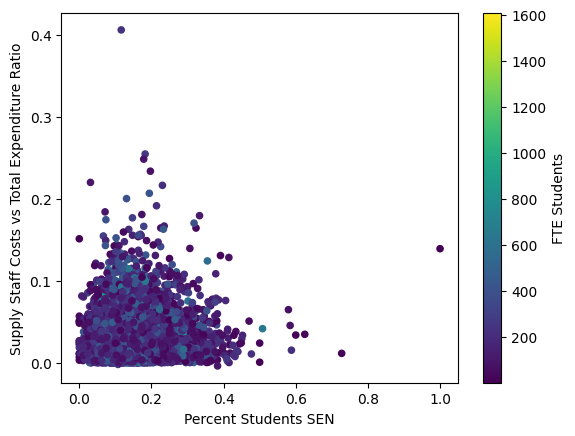

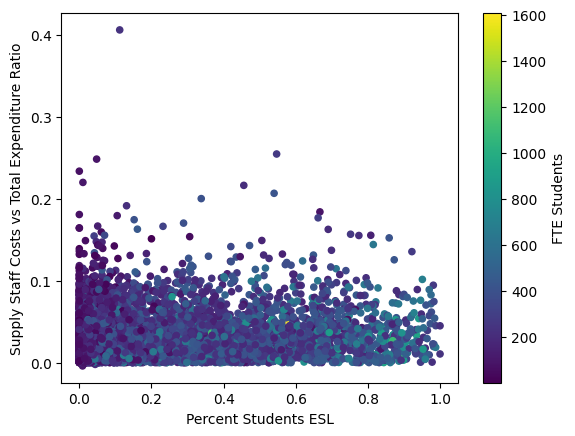

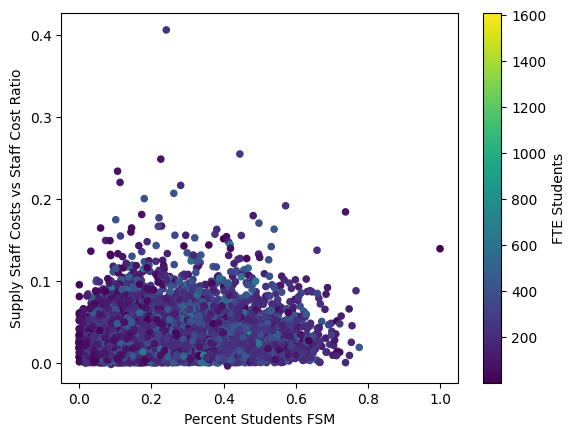

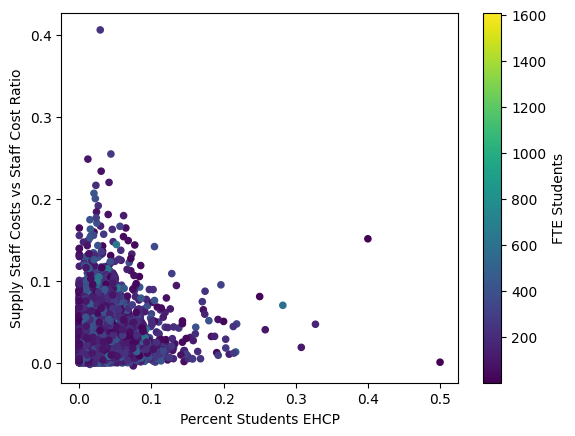

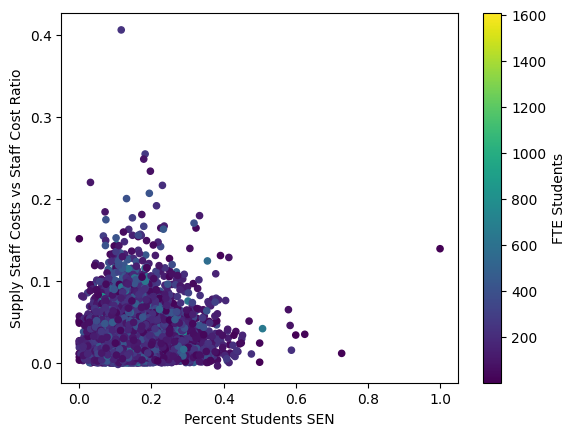

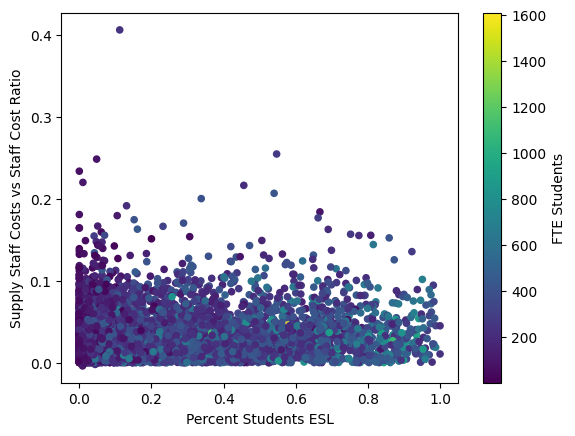

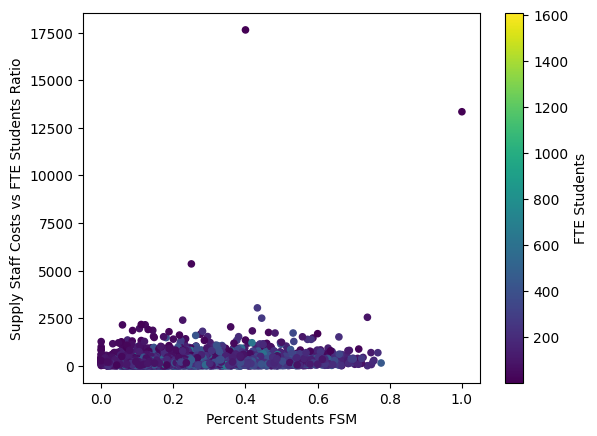

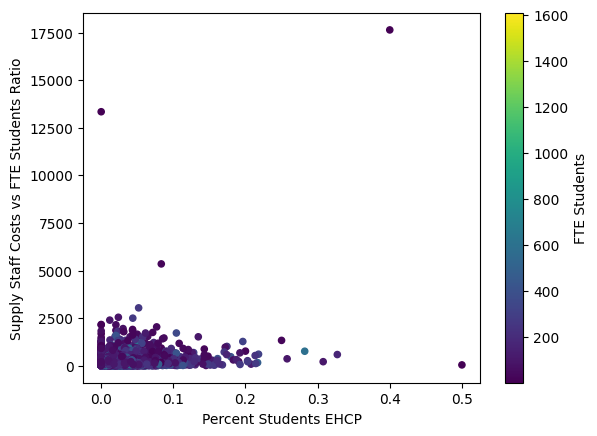

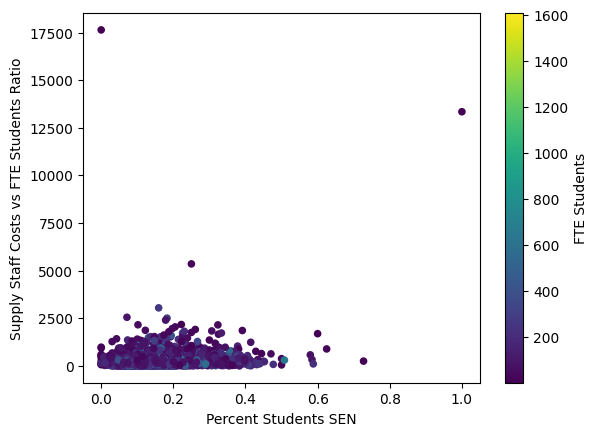

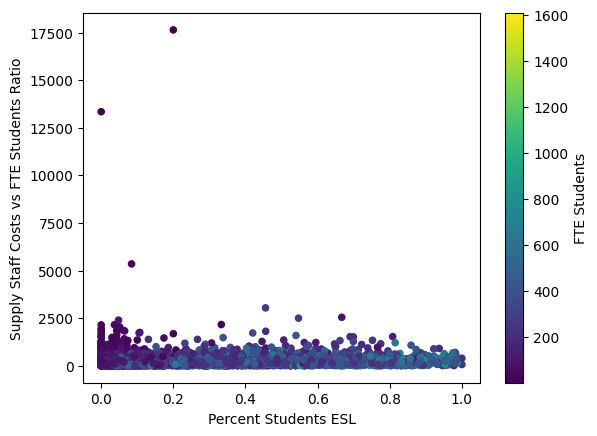

In [193]:
plot_student_groups('Supply Staff Costs vs Total Expenditure Ratio')
plot_student_groups('Supply Staff Costs vs Staff Cost Ratio')
plot_student_groups('Supply Staff Costs vs FTE Students Ratio')

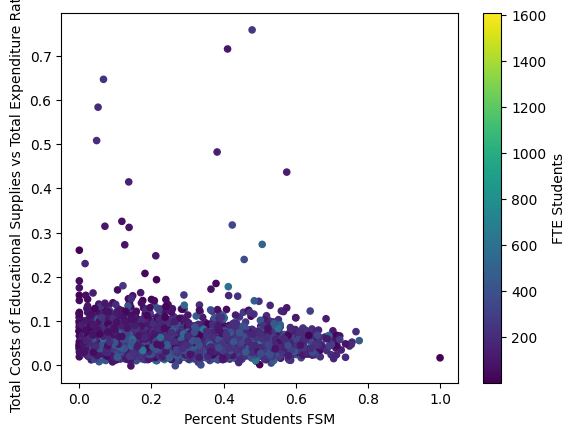

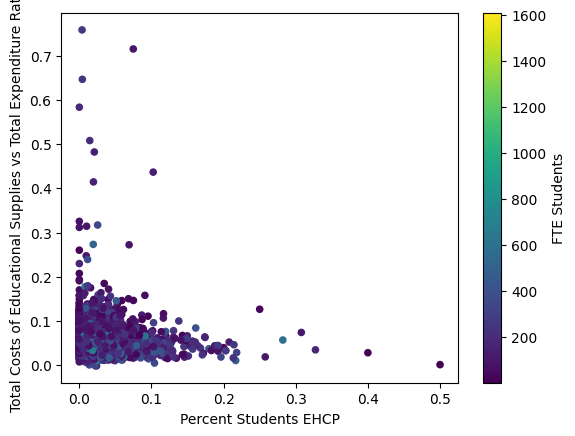

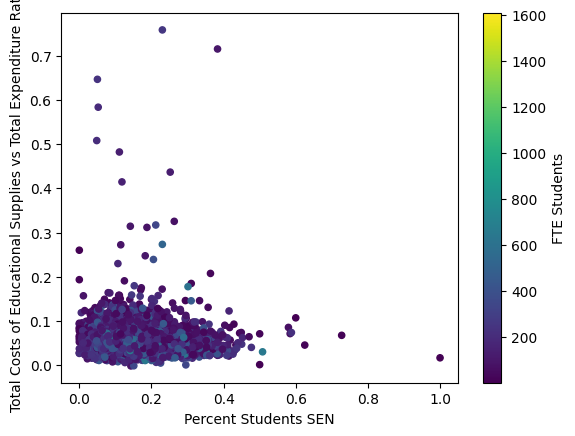

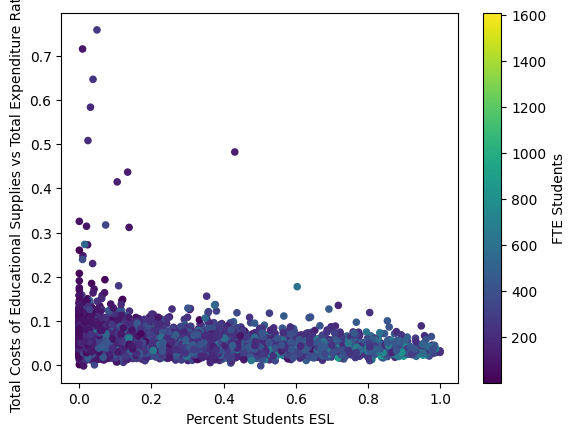

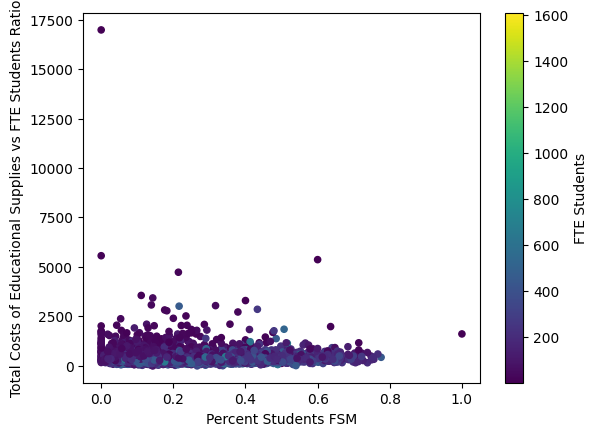

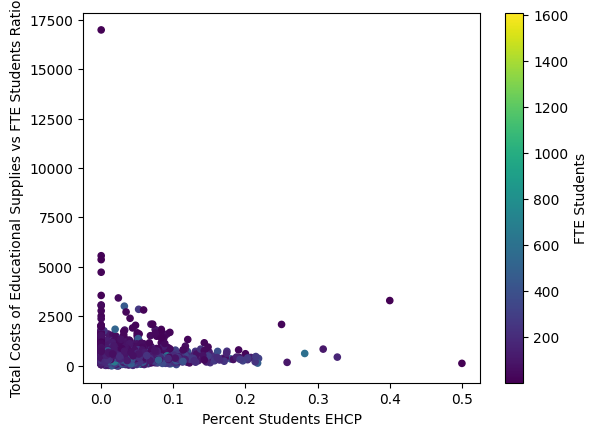

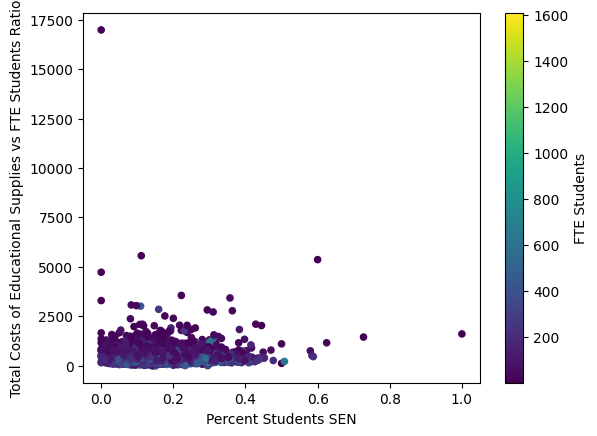

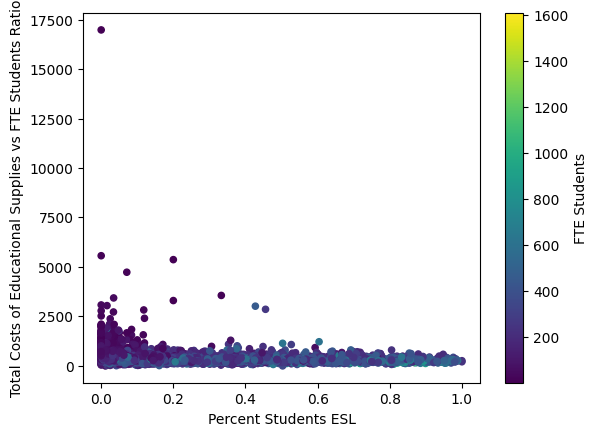

In [194]:
plot_student_groups('Total Costs of Educational Supplies vs Total Expenditure Ratio')
plot_student_groups('Total Costs of Educational Supplies vs FTE Students Ratio')

<Axes: xlabel='Total Income', ylabel='Total Expenditure'>

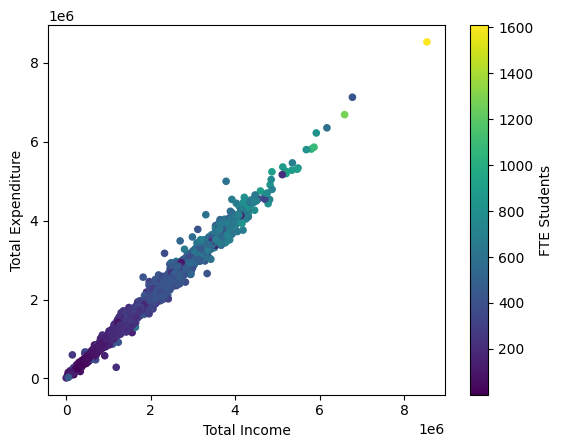

In [195]:
df.loc[(df['Overall Phase'] == 'Primary') & (df['Region'] != 'London')].plot.scatter(x='Total Income', y='Total Expenditure', c='FTE Students')

In [196]:
df['Classroom Staff'] = df['Teaching Staff'] + df['Supply Staff Costs'] + df['Education support staff']
df['Non Classroom Staff'] = df['Total Staff Costs'] - df['Classroom Staff']
df[['URN', 'School Name', 'Classroom Staff', 'Total Staff Costs', 'Other Staff Costs']]

URN                             School Name  Classroom Staff  \
0      100010.0                Brecknock Primary School       1838262.54   
1      100013.0            Edith Neville Primary School       1118277.74   
2      100021.0           Rhyl Community Primary School       3083670.59   
3      100022.0           Richard Cobden Primary School       2420243.73   
4      100027.0           Eleanor Palmer Primary School       1296628.75   
...         ...                                     ...              ...   
10024  112328.0        Shap Endowed CofE Primary School        406105.53   
10025  112356.0        Leven Valley CofE Primary School        302989.83   
10026  112372.0              Warcop CofE Primary School        389992.38   
10027  112415.0  Ireleth St Peter's CofE Primary School        364415.04   
10028  112419.0                       Orton CofE School        336429.95   

       Total Staff Costs  Other Staff Costs  
0             2060111.22          102566.91  
1             1278567.31           58852.15  
2             3603393.22          283240.57  
3             2721894.90          124298.90  
4             1479608.98           52178.83  
...                  ...                ...  
10024          462513.78           19740.06  
10025          331411.25           13746.23  
10026          434029.91           24066.61  
10027          397391.00           16382.66  
10028          373949.99           14121.39  

[10029 rows x 5 columns]

<Axes: xlabel='Classroom Staff', ylabel='Non Classroom Staff'>

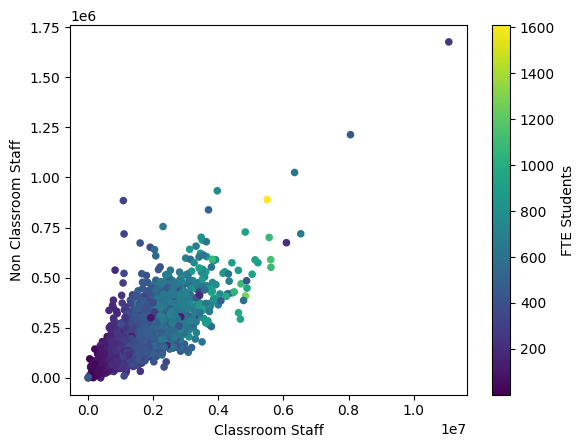

In [197]:
df.plot.scatter(x='Classroom Staff', y='Non Classroom Staff', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Teaching Staff'>

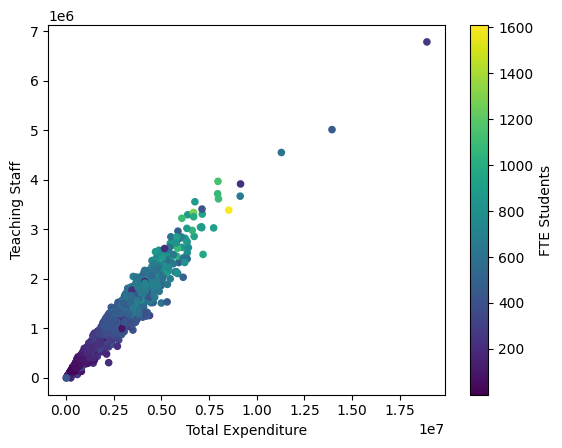

In [198]:
df.plot.scatter(x='Total Expenditure', y='Teaching Staff', c='FTE Students')

In [199]:
def show_stats (col):
    agg_func_math = {
        col + ' vs Total Expenditure Ratio':
        ['mean', 'median', 'min', 'max', 'std', 'var']
    }
    return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)

show_stats('Teaching Staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Teaching Staff vs Total Expenditure Ratio                     \
                                                     mean median   min   max   
Student Buckets                                                                
200                                                  0.44   0.45  0.11  0.67   
400                                                  0.44   0.45  0.11  0.60   
600                                                  0.45   0.45  0.25  0.60   
800                                                  0.45   0.45  0.30  0.58   
1000                                                 0.45   0.45  0.35  0.54   
1200                                                 0.47   0.45  0.42  0.53   
1400                                                 0.50   0.50  0.50  0.50   
1600                                                 0.40   0.40  0.40  0.40   

                            
                  std  var  
Student Buckets             
200              0.06  0.0  
400              0.05  0.0  
600              0.05  0.0  
800              0.04  0.0  
1000             0.05  0.0  
1200             0.04  0.0  
1400              NaN  NaN  
1600              NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Supply Staff Costs'>

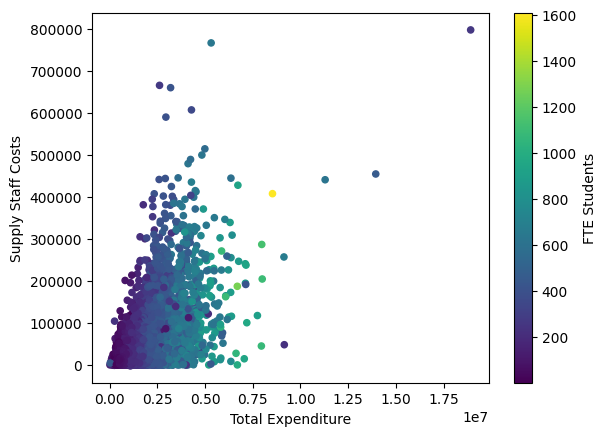

In [200]:
                    
df.plot.scatter(x='Total Expenditure', y='Supply Staff Costs', c='FTE Students')

In [201]:
show_stats('Supply Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Supply Staff Costs vs Total Expenditure Ratio               \
                                                         mean median   min   
Student Buckets                                                              
200                                                      0.03   0.02  0.00   
400                                                      0.03   0.02  0.00   
600                                                      0.03   0.02  0.00   
800                                                      0.03   0.02  0.00   
1000                                                     0.03   0.03  0.00   
1200                                                     0.02   0.03  0.00   
1400                                                     0.03   0.03  0.03   
1600                                                     0.05   0.05  0.05   

                                  
                  max   std  var  
Student Buckets                   
200              0.25  0.02  0.0  
400              0.41  0.02  0.0  
600              0.21  0.02  0.0  
800              0.14  0.02  0.0  
1000             0.08  0.02  0.0  
1200             0.05  0.02  0.0  
1400             0.03   NaN  NaN  
1600             0.05   NaN  NaN

<Axes: xlabel='Supply Staff Costs vs Total Expenditure Ratio', ylabel='Teaching Staff vs Total Expenditure Ratio'>

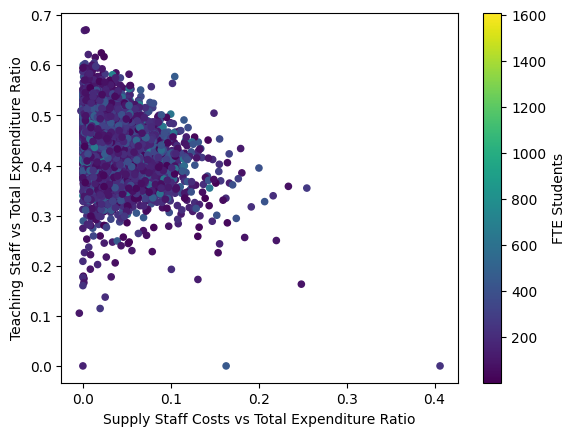

In [202]:
df.plot.scatter(x='Supply Staff Costs vs Total Expenditure Ratio', y='Teaching Staff vs Total Expenditure Ratio', c='FTE Students')

<Axes: xlabel='Supply Staff Costs vs Total Expenditure Ratio', ylabel='FTE Teachers'>

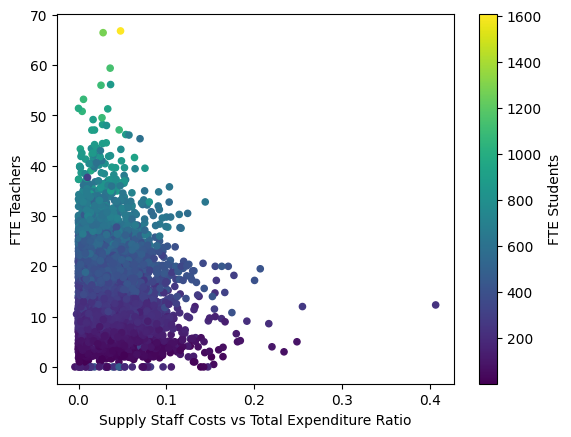

In [203]:
df.plot.scatter(x='Supply Staff Costs vs Total Expenditure Ratio', y='FTE Teachers', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Education support staff'>

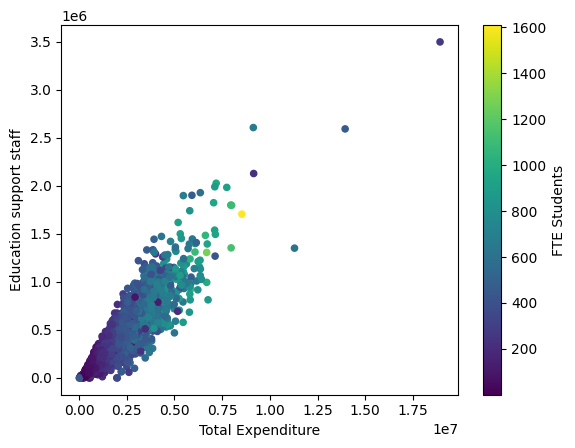

In [204]:

df.plot.scatter(x='Total Expenditure', y='Education support staff', c='FTE Students')

In [205]:
show_stats('Education support staff')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Education support staff vs Total Expenditure Ratio         \
                                                              mean median   
Student Buckets                                                             
200                                                           0.17   0.17   
400                                                           0.19   0.19   
600                                                           0.20   0.20   
800                                                           0.20   0.20   
1000                                                          0.19   0.19   
1200                                                          0.20   0.22   
1400                                                          0.20   0.20   
1600                                                          0.20   0.20   

                                        
                  min   max   std  var  
Student Buckets                         
200              0.01  0.36  0.05  0.0  
400              0.00  0.38  0.05  0.0  
600              0.03  0.39  0.05  0.0  
800              0.07  0.35  0.04  0.0  
1000             0.11  0.31  0.05  0.0  
1200             0.16  0.23  0.03  0.0  
1400             0.20  0.20   NaN  NaN  
1600             0.20  0.20   NaN  NaN

<Axes: xlabel='Supply Staff Costs vs Total Expenditure Ratio', ylabel='Education support staff vs Total Expenditure Ratio'>

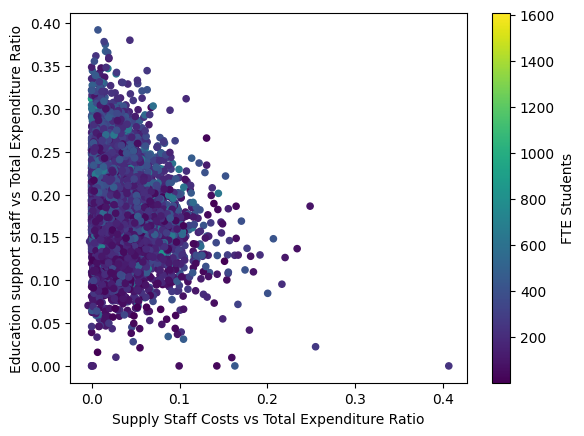

In [206]:
df.plot.scatter(x='Supply Staff Costs vs Total Expenditure Ratio', y='Education support staff vs Total Expenditure Ratio', c='FTE Students')

<Axes: xlabel='Supply Staff Costs vs Total Expenditure Ratio', ylabel='Education support staff vs Total Expenditure Ratio'>

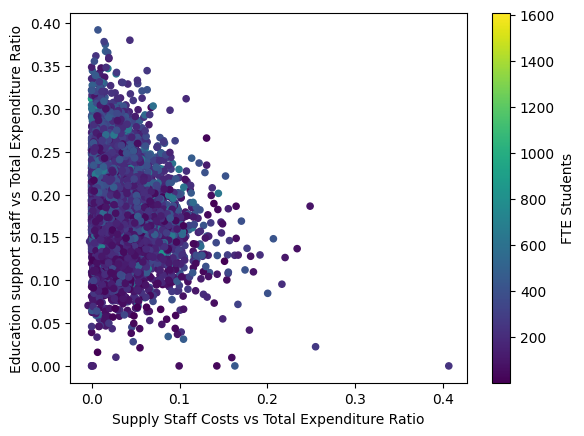

In [208]:
df.plot.scatter(x='Supply Staff Costs vs Total Expenditure Ratio', y='Education support staff vs Total Expenditure Ratio', c='FTE Students')

<Axes: xlabel='Total Expenditure', ylabel='Total Staff Costs'>

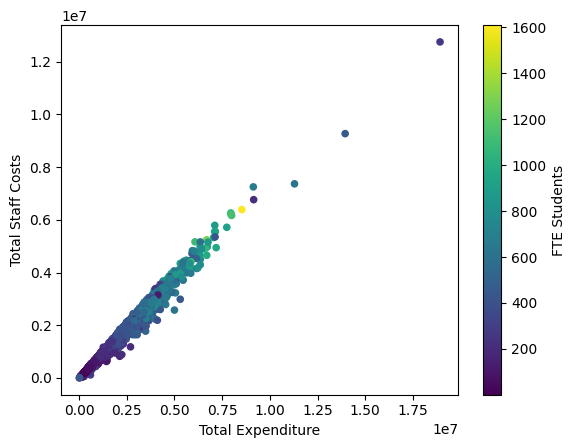

In [209]:

df.plot.scatter(x='Total Expenditure', y='Total Staff Costs', c='FTE Students')

In [210]:
show_stats('Total Staff Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Staff Costs vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.73   0.74  0.20   
400                                                     0.74   0.75  0.19   
600                                                     0.75   0.76  0.29   
800                                                     0.76   0.77  0.52   
1000                                                    0.76   0.76  0.67   
1200                                                    0.77   0.77  0.72   
1400                                                    0.78   0.78  0.78   
1600                                                    0.75   0.75  0.75   

                                  
                  max   std  var  
Student Buckets                   
200              0.91  0.05  0.0  
400              0.92  0.04  0.0  
600              0.87  0.04  0.0  
800              0.85  0.04  0.0  
1000             0.82  0.04  0.0  
1200             0.85  0.04  0.0  
1400             0.78   NaN  NaN  
1600             0.75   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Maintenance & Improvement Costs'>

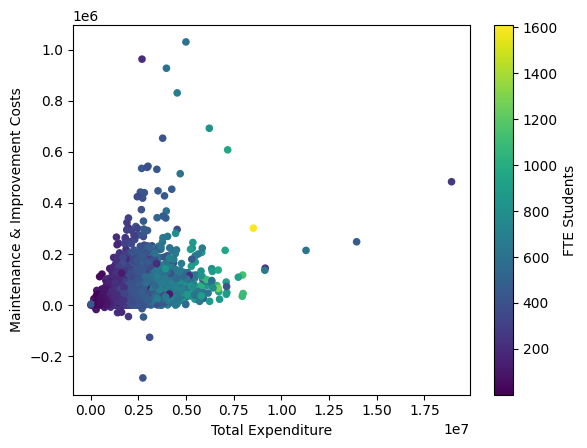

In [211]:

df.plot.scatter(x='Total Expenditure', y='Maintenance & Improvement Costs', c='FTE Students')

In [212]:
show_stats('Maintenance & Improvement Costs')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Maintenance & Improvement Costs vs Total Expenditure Ratio  \
                                                                      mean   
Student Buckets                                                              
200                                                           0.02           
400                                                           0.02           
600                                                           0.02           
800                                                           0.02           
1000                                                          0.02           
1200                                                          0.01           
1400                                                          0.01           
1600                                                          0.04           

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.02  0.00  0.23  0.02  0.0  
400               0.02  0.00  0.36  0.02  0.0  
600               0.02  0.00  0.20  0.02  0.0  
800               0.01  0.00  0.23  0.02  0.0  
1000              0.01  0.00  0.11  0.02  0.0  
1200              0.01  0.00  0.02  0.01  0.0  
1400              0.01  0.01  0.01   NaN  NaN  
1600              0.04  0.04  0.04   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Energy'>

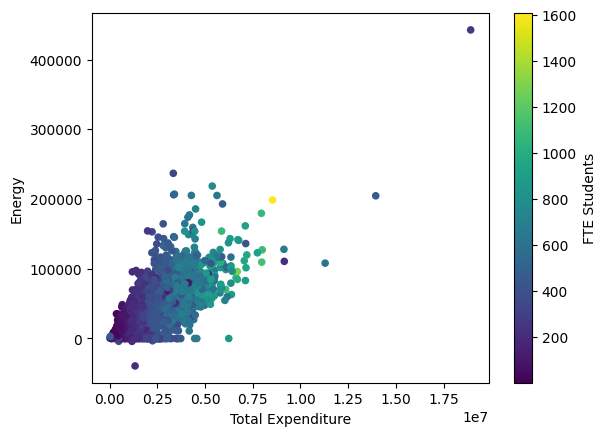

In [213]:

df.plot.scatter(x='Total Expenditure', y='Energy', c='FTE Students')

In [214]:
show_stats('Energy')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Energy vs Total Expenditure Ratio                           \
                                             mean median   min   max   std   
Student Buckets                                                              
200                                          0.02   0.02  0.00  0.10  0.01   
400                                          0.02   0.02  0.00  0.08  0.01   
600                                          0.02   0.02  0.00  0.11  0.01   
800                                          0.02   0.02  0.00  0.05  0.01   
1000                                         0.02   0.02  0.01  0.04  0.01   
1200                                         0.02   0.02  0.01  0.03  0.01   
1400                                         0.01   0.01  0.01  0.01   NaN   
1600                                         0.02   0.02  0.02  0.02   NaN   

                      
                 var  
Student Buckets       
200              0.0  
400              0.0  
600              0.0  
800              0.0  
1000             0.0  
1200             0.0  
1400             NaN  
1600             NaN

<Axes: xlabel='Total Expenditure', ylabel='Total Costs of Educational Supplies'>

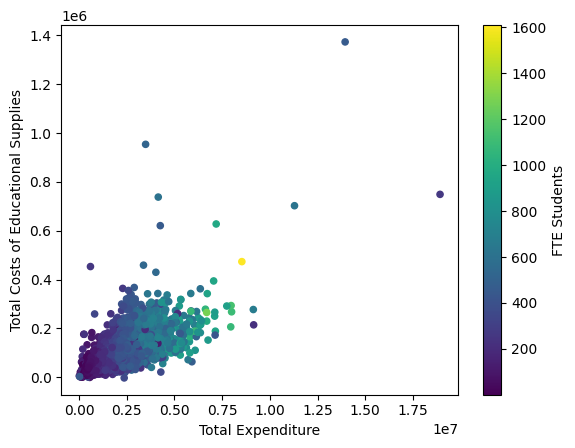

In [215]:

df.plot.scatter(x='Total Expenditure', y='Total Costs of Educational Supplies', c='FTE Students')

In [216]:
show_stats('Total Costs of Educational Supplies')

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Total Costs of Educational Supplies vs Total Expenditure Ratio  \
                                                                          mean   
Student Buckets                                                                  
200                                                           0.06               
400                                                           0.05               
600                                                           0.05               
800                                                           0.04               
1000                                                          0.04               
1200                                                          0.03               
1400                                                          0.04               
1600                                                          0.06               

                                               
                median   min   max   std  var  
Student Buckets                                
200               0.05  0.00  0.72  0.03  0.0  
400               0.05  0.00  0.76  0.03  0.0  
600               0.05  0.01  0.27  0.02  0.0  
800               0.04  0.01  0.18  0.02  0.0  
1000              0.03  0.02  0.09  0.01  0.0  
1200              0.03  0.03  0.05  0.01  0.0  
1400              0.04  0.04  0.04   NaN  NaN  
1600              0.06  0.06  0.06   NaN  NaN

<Axes: xlabel='Total Expenditure', ylabel='Catering supplies'>

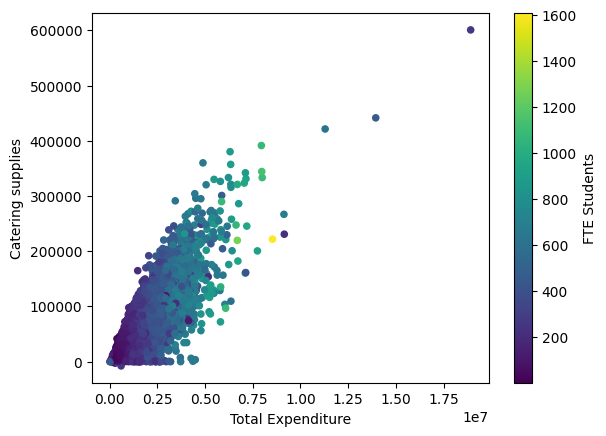

In [217]:

df.plot.scatter(x='Total Expenditure', y='Catering supplies', c='FTE Students')

In [218]:
show_stats("Catering supplies")

/var/folders/ff/_x3p1ls14rzcy615mhvjdsk80000gn/T/ipykernel_55526/1363793428.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df[df[col + ' vs Total Expenditure Ratio'] > 0].groupby(['Student Buckets']).agg(agg_func_math).round(2)


Catering supplies vs Total Expenditure Ratio               \
                                                        mean median   min   
Student Buckets                                                             
200                                                     0.04   0.04  0.00   
400                                                     0.04   0.04  0.00   
600                                                     0.04   0.04  0.00   
800                                                     0.04   0.04  0.00   
1000                                                    0.04   0.04  0.01   
1200                                                    0.04   0.04  0.02   
1400                                                    0.03   0.03  0.03   
1600                                                    0.03   0.03  0.03   

                                  
                  max   std  var  
Student Buckets                   
200              0.11  0.01  0.0  
400              0.11  0.01  0.0  
600              0.08  0.01  0.0  
800              0.08  0.01  0.0  
1000             0.06  0.01  0.0  
1200             0.05  0.01  0.0  
1400             0.03   NaN  NaN  
1600             0.03   NaN  NaN